#Sprint Challenge Pierre Damiba


## Import Libraries


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import Data

In [0]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [0]:
#Looks good. While it may be tempting to replace some our variable with encoding,(I.e turn eng type into 4 boolean columns, I suspect that there is a relationship between the variables. For example, drive 1 could be 2 wheel while drive 2 could be 4 wheel. We want to preserve these relationships in case they are significant.

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
#Drop the price from X, as that is what we want to predict, define y as price, as that is our target.
X = df.drop('price', axis=1)
y = df.price

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
#Using sklearn magic to split my data into four groups, test and train for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
#Define a function for linear regression, so that we can use it repeatedly.
#We will use X and y, where y is a target, and a test size of .25
def LinReg(X, y, testsize=0.25):
  
  # Chop up our data into bits for testing and training(We did this already for 1.2, but not in the function)
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=testsize, random_state=42)
  
  #Create model using datafrom out test set
  model = LinearRegression()
  model.fit(X_train, Y_train)

  # Generate new predictions using X
  y_pred = model.predict(X_test)

  # How effective if our model?
  RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
  R2 = r2_score(Y_test, y_pred)
  
  #Lambda magic to make our coefficients print out nicely
  coefs_format = map(float, map(lambda x: '{:.25}'.format(x), model.coef_))
  
  #Return all the information we need
  return {'Predictions': y_pred, 'RMSE': RMSE, 'R2': R2, 'coefficients': list((coefs_format)), 'intercept': model.intercept_}

In [0]:
#Actually create the model using X and y from above
model_a = LinReg(X,y)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [0]:
#Define a variable to report the intercept and coeffeicients.
Int_Coef = f"Intercept: {model_a['intercept']:.25}\n\nCoefficients: {model_a['coefficients']}"

print(Int_Coef)

Intercept: -2278702.149045469705015421

Coefficients: [-33.80914554237605, -1721.0250109848403, -39.96352171750823, 272.10204942616076, -1085.3334443364547, 4487.518109358849, 1145.2506680966533, 8462.04541338759]


## 1.5 Use the test data to make predictions

In [0]:
#We defined this earlier, so now we just plug in our model from the function for predictions
model_a['Predictions']

array([19194.45968216,  5367.93233327, 26151.89784368, ...,
       21790.01574206, 11486.29535553,  8099.62613193])


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [0]:
#Same as above, just plug in our information and let the function do the work.
RMSE_rsquared = f"RMSE: {model_a['RMSE']:.3}\n\nCoefficient of Variation: {model_a['R2']:.3}"

print(RMSE_rsquared)

RMSE: 2.03e+04

Coefficient of Variation: 0.305


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The correlation coefficient of the year attemps to capture the strength and the direction of the impact of the year on price.

![alt text](https://i.imgur.com/XbBe2d4.png)

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE attempts to capture the accuracy of your model. How close do your predictions come to actual results? You want youur RMSE to be as close to 0 as possible. If your RMSE is too small however, you very well may be overfitting your model, and you will not be able to use the model for other datasets. RMSE is also a relative measure, so an RMSE of 50,000 would be pretty bad when looking at a 100,000 home, but if you were looking at a 10,000,000,000 property, an RMSE of 50,000 would be fantastic. You can use things like log to get RMSE as a percentage as well. 

## 1.9 How should we interpret the $R^2$?

R-sqaured will always be between 0-1, and it can be thought of as a ratio or percentage. This number attemps to capture the variance that can be explained by the model. We compare the variance of the dependent and independent variables in our model to get r-squared.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
#Numpy does all the work for us here, just have to create a new column for the data
df['ln_price'] = np.log(df.price)



## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

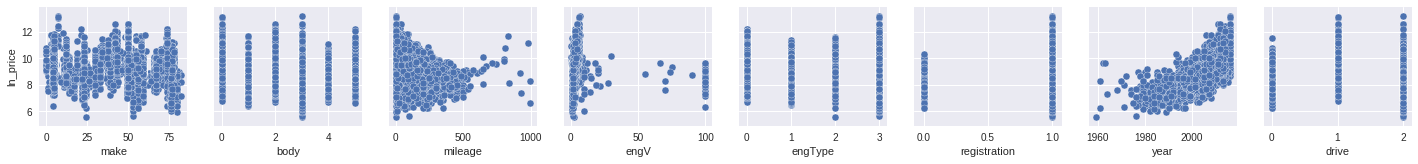

In [0]:
#Simple pairplot
sns.pairplot(data=df.drop('price', axis=1), 
              x_vars=df.columns.drop(['price', 'ln_price']), 
              y_vars='ln_price');

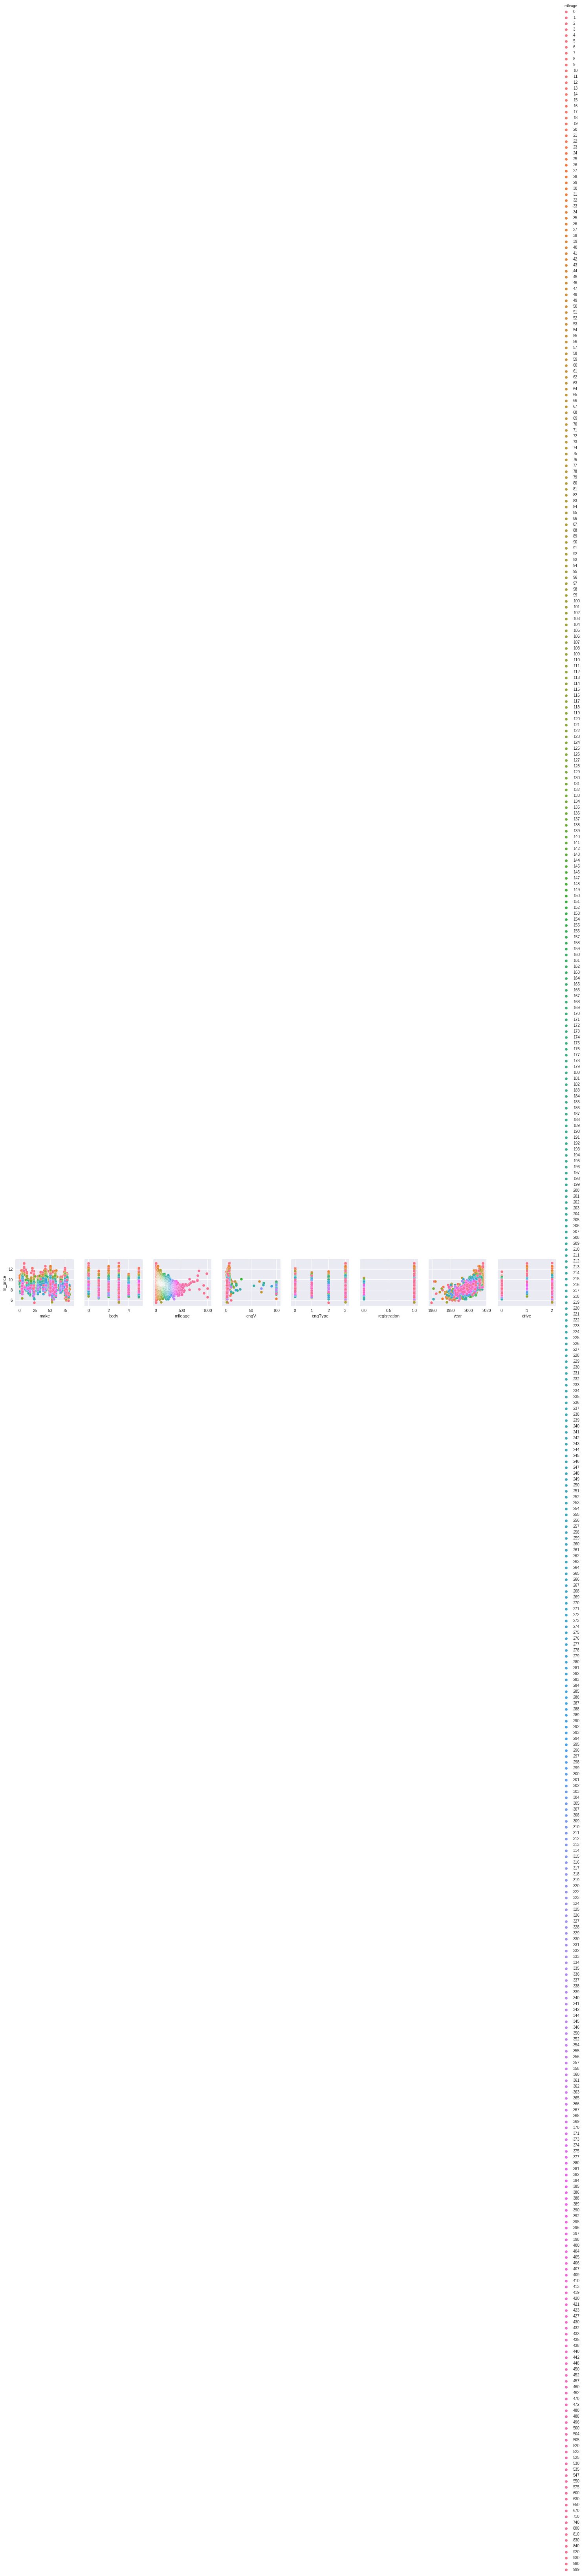

In [0]:
#Useing milage as the hue, we can get a little more information. Have to scroll a bit...
sns.pairplot(data=df.drop('price', axis=1), hue='mileage',
              x_vars=df.columns.drop(['price', 'ln_price']), 
              y_vars='ln_price');

## 2.3 If appropriate, create any polynomial features. 

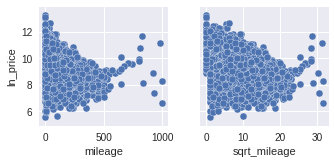

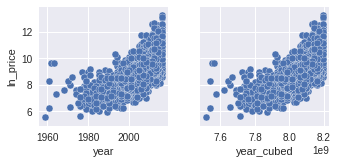

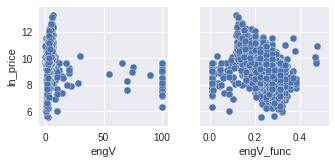

In [0]:
# Let's try to capture some of the variange in the milage variable 
df['sqrt_mileage'] = np.sqrt(df.mileage)

sns.pairplot(data=df, x_vars=['mileage', 'sqrt_mileage'], y_vars='ln_price')

## I tried squaring and cubing year. I like cubed better, more of a straight line
df['year_cubed'] = df.year ** 3

sns.pairplot(data=df, x_vars=['year', 'year_cubed'], y_vars='ln_price');

# I wonder what I can do with that EngV...maybe spread it out a bit?: 
df['engV_func'] = np.divide(1, df.engV+2)

sns.pairplot(data=df, x_vars=['engV', 'engV_func'], y_vars='ln_price');

#I think we could have square the EngV as well, and spread out miles, but I thought these results could be more interesting.

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
#This is why we defined our LinReg function earlier, now we can just plug and play with our new variables
model_b = LinReg(df[['make', 'sqrt_mileage', 'engV', 'year', 'year_cubed', 'mileage', 'engV_func']], df.ln_price)


Int_Coef_2 = f"Intercept: {model_b['intercept']:.3}\n\nCoefficients: {model_b['coefficients']}\n\n"

RMSE_rsquared_2 = f"RMSE: {model_b['RMSE']:.25}\n\nCoefficient of Determination: {model_b['R2']:.25}\n"

print(Int_Coef_2 + RMSE_rsquared_2)

Intercept: 5.22e+03

Coefficients: [-0.0004070514596533088, -0.03231374184187273, -0.0315456421230315, -3.948123456953176, 3.3613884942856886e-07, 0.0011315187503639066, -11.333754604871832]

RMSE: 0.4506295336834151288307737

Coefficient of Determination: 0.7847173246960646997294475



In [0]:
#Now without the repeats..
model_b = LinReg(df[['make', 'sqrt_mileage','year_cubed', 'engV_func']], df.ln_price)


Int_Coef_2 = f"Intercept: {model_b['intercept']:.3}\n\nCoefficients: {model_b['coefficients']}\n\n"

RMSE_rsquared_2 = f"RMSE: {model_b['RMSE']:.25}\n\nCoefficient of Determination: {model_b['R2']:.25}\n"

print(Int_Coef_2 + RMSE_rsquared_2)

Intercept: -45.1

Coefficients: [-0.0005414771691479911, -0.032695761848359206, 7.055785684884075e-09, -9.710904466480768]

RMSE: 0.5082400252990174616130048

Coefficient of Determination: 0.7261533031754103806321154



## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient is negative which suggests that as cars get older, the price goes up when we use all the variables. When we reduce variables to account for multicollinaearity,  and cube the year, the year coeffecient becomes a tiny number close to 0. We would want to investigate the data further to see if this is true.




# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seeks to minimize the cost function. It finds the values for the coefficients by changing paramerters to find the local minimum.

## 3.2 What is the "Learning Rate" and what is its function?

How big are the steps my Gradient descent will take? The learning rate assigns a speed to move towards the optimal weights. If the steps are too bitg, you will bounce back and forth between the convex function and never reach the minimum. If it is too small, it will take too much time to reach the minimum. You have to find the right learning rate that isn't too high or low, which you can use an elbow graph to eyeball.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [0]:
#Let's go with a log-linear model

In [0]:
X=df[['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive']]
y=df['ln_price']

In [0]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2040.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:49:31   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      2.144    -84.810   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object') 


[123262.01363199769, 1.0591492515492282, 1.1583256001339475, 1.5496097971160896, 1.0093210319338703, 1.1411828507373443, 1.0918920928785216, 1.4585277185506464, 1.1310208897031016]


We do indeed have multicollinearity problems.  Rule of thumb is less than 10 and our number is much bigger than our result!